# Comparing Distributions

In [26]:
import pandas as pd
import numpy as np
import scipy

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
from sklearn.datasets import load_breast_cancer
#The breast cancer dataset is a classic and very easy binary classification dataset.
dataset = load_breast_cancer() 

#create the dataframe
df = pd.DataFrame(dataset.data)
columns = dataset.feature_names
df.columns = columns
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [28]:
mr=df['mean radius']

<AxesSubplot:xlabel='mean radius'>

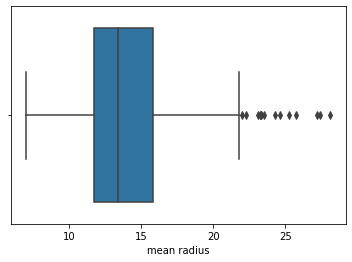

In [29]:
# We create a boxplot of the first columns called "mean radius"
sns.boxplot(data=df, x='mean radius')

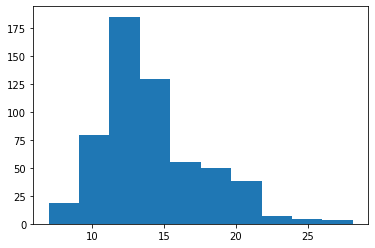

In [30]:
# We create the histogram 
plt.hist(mr)
plt.show()

In [31]:
# and check the main distribution  parameters
mr.describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: mean radius, dtype: float64

In [32]:
# We scale the data 
df_mr=pd.DataFrame(mr)
#dataset scaling and visualizing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=False)
scaler.fit(pd.DataFrame(df_mr)) 
mr_scaled=scaler.transform(df_mr)

In [33]:
# but we get a array of (single) arrays
mr_scaled[1:5,:]

array([[ 1.82982061],
       [ 1.57988811],
       [-0.76890929],
       [ 1.75029663]])

In [34]:
# so we "flatten" the array
mr_scaled=mr_scaled.flatten()
mr_scaled

array([ 1.09706398,  1.82982061,  1.57988811, -0.76890929,  1.75029663,
       -0.47637467,  1.17090767, -0.11851678, -0.32016686, -0.47353452,
        0.53755602,  0.46939261,  1.43220073,  0.4892736 , -0.11283649,
        0.117215  ,  0.15697699,  0.56879758,  1.61396982, -0.16679919,
       -0.29744572, -1.31308049,  0.34442636,  1.99738898,  0.71648496,
        0.85565191,  0.12857557,  1.27315278,  0.33306579,  0.97777802,
        1.27883307, -0.64962332,  0.82157021,  1.46060215,  0.56879758,
        0.74204624,  0.03485089, -0.31164643,  0.24502139, -0.18384004,
       -0.19520061, -0.90239596,  1.40379931, -0.24064288, -0.27188444,
        1.28451335, -1.68457106, -0.27188444, -0.58998034, -0.1809999 ,
       -0.67234446, -0.13839777, -0.62122191,  1.16238725,  0.27626295,
       -0.74050787,  1.4435613 ,  0.16549742, -0.30596615, -1.56471706,
       -1.12392703, -1.57039735,  0.03485089, -1.40708919, -0.4110514 ,
        0.18537841, -1.32415704, -0.80015085, -1.44798723, -0.38

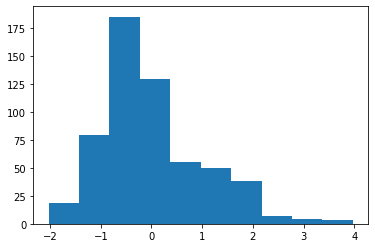

In [35]:
#Now is normalized!
plt.hist(mr_scaled)
plt.show()

In [36]:
# In order to check the distribution we can generate probability distributions and fit it to our specific data
# The library scipy.stats provide a set of tools for generate samples with a given theoretical prob. distribution
dist=scipy.stats.gamma
#dist = getattr(scipy.stats, 'norm')
param = dist.fit(mr_scaled)
param

(5.2522981710301195, -2.258530855286059, 0.43000801938966693)

In [37]:
# Clearly the normal that best approximate our data is with mean 0 and std 1 

### Test 1. Uniform distribution

In [39]:
# A list of possible probability distributions
#dist_names = ['beta',
#              'expon',
#              'gamma',
#              'norm',
#              'uniform']

# We test a uniform distribution
dist = getattr(scipy.stats, 'uniform')
param = dist.fit(mr_scaled)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
normal_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(mr_scaled))

In [40]:
def compare_dist(dist_1, dist_2) :
    dist_1.sort()
    # We create the percentiles for both distributions
    percs = np.linspace(0,100,21)
    q_a = np.percentile(dist_1, percs)
    q_b = np.percentile(dist_2, percs)

    # and generate the QQ-plot 
    plt.plot(q_a,q_b, ls="", marker="o")
    plt.title("QQ plot")
    x = np.linspace(np.min((q_a.min(),q_b.min())), np.max((q_a.max(),q_b.max())))
    plt.plot(x,x, color="k", ls="--")
    plt.show()

    plt.hist(dist_1,alpha=.3,density=True)
    plt.hist(dist_2,alpha=.3,density=True)
    plt.show()


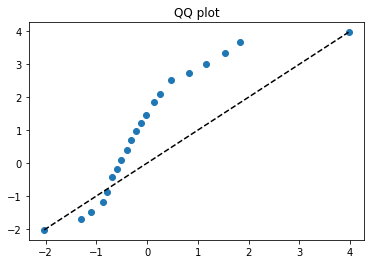

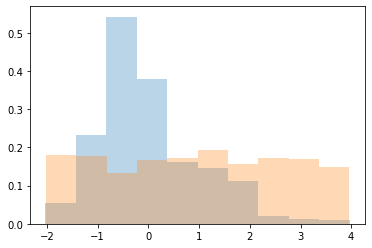

In [41]:
compare_dist(mr_scaled,normal_dist)

We see that our distribution have more weight at the beginning of the interval respect to the end

### Test 2. Test Exponential distribution

In [42]:
# We test a exponential distribution
dist = getattr(scipy.stats, 'expon')
param = dist.fit(mr_scaled)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
exp_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(mr_scaled))
exp_dist.sort()

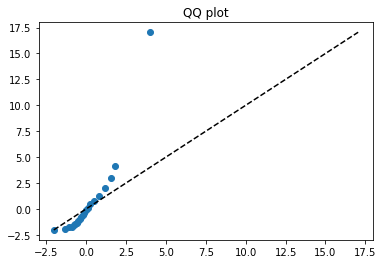

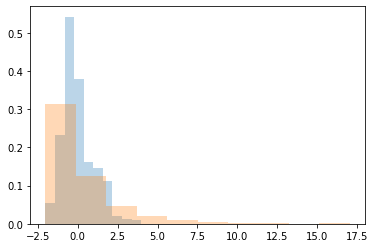

In [43]:
compare_dist(mr_scaled,exp_dist)

In this case our distribution have less weight at the beggining of the interval respect to the reference distribution

### The normal distribution

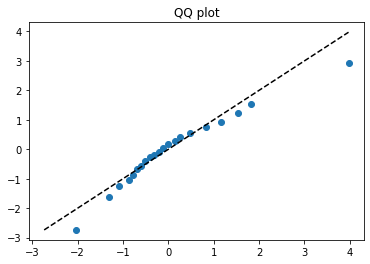

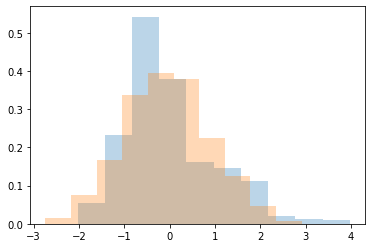

In [44]:
# We test a normal distribution
dist = getattr(scipy.stats, 'norm')
param = dist.fit(mr_scaled)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
norm_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(mr_scaled))

compare_dist(mr_scaled,norm_dist)


#### Hypothesis test

In [46]:
from scipy import stats

# D'agostino normality test
print(stats.normaltest(mr_scaled))
# Shapiro test of normality
print(stats.shapiro(mr_scaled))

NormaltestResult(statistic=73.17938185797071, pvalue=1.286172249506379e-16)
ShapiroResult(statistic=0.941069483757019, pvalue=3.106064735383836e-14)


In [47]:
# Kolmogorov-Smirnov Test
print(stats.kstest(mr_scaled, "norm"))
print(stats.kstest(mr_scaled, norm_dist))
# normality tests use a (0,1) normal distribution 

KstestResult(statistic=0.11273020428287472, pvalue=9.379762733102699e-07)
KstestResult(statistic=0.07908611599297012, pvalue=0.05690716682834241)


### Test 4. The Gamma distribution 

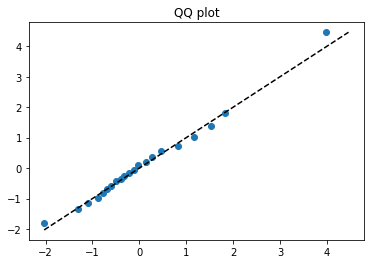

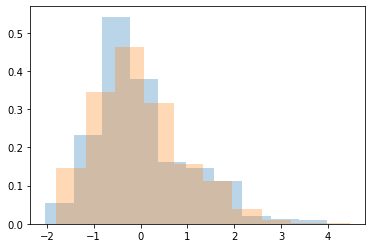

In [48]:
# We test a exponential distribution
dist = getattr(scipy.stats, 'gamma')
param = dist.fit(mr_scaled)
    
# We generate a sample of size  len(mr_scaled) of data distributed according to distribution dist
# The function rvs generates a sample with distribution dist with mean loc and std scale
gamma_dist = dist.rvs(*param[0:-2],loc=param[-2], scale=param[-1],size = len(mr_scaled))

compare_dist(mr_scaled,gamma_dist)


Finally we see that the Gamma distribution fits our empirical data distribution  

### Hypothesis test

In [49]:
# Kolmogorov-Smirnov Test
#    Test the distribution G(x) against a given distribution F(x).
#    Under the null hypothesis the two distributions are identical, G(x)=F(x).

from scipy import stats
stats.kstest(mr_scaled, gamma_dist)

KstestResult(statistic=0.0421792618629174, pvalue=0.6925796661482552)